In [10]:
import numpy as np

# Perceptron Learning Algorithm Implementation
def perceptron(X, y, max_iters=1000):
    w = np.zeros(X.shape[1])  # Initialize weights to zero
    for _ in range(max_iters):
        misclassified = False
        for i in range(X.shape[0]):
            if np.sign(np.dot(X[i], w)) != y[i]:  # Check for misclassification
                w += y[i] * X[i]  # Update weights based on misclassified point
                misclassified = True
        if not misclassified:  # Stop if no misclassification
            break
    return w

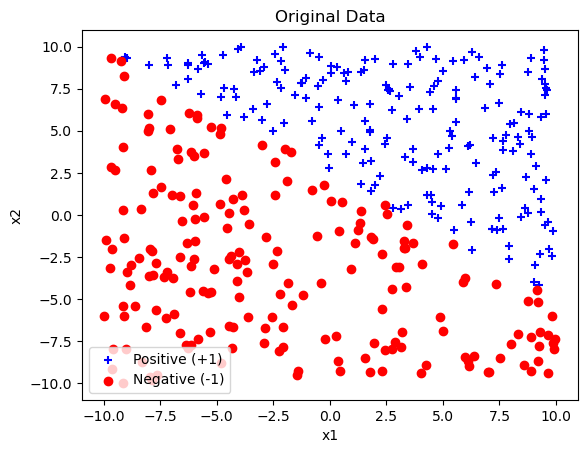

In [11]:
import matplotlib.pyplot as plt

# Generate Data
np.random.seed(0)
positive_samples = []
negative_samples = []

while len(positive_samples) < 200:
    x1, x2 = np.random.uniform(-10, 10, 2)
    if 3*x1 + 4*x2 - 10 > 0:
        positive_samples.append([1, x1, x2])  # Bias term added (x0 = 1)

while len(negative_samples) < 200:
    x1, x2 = np.random.uniform(-10, 10, 2)
    if 3*x1 + 4*x2 - 10 < 0:
        negative_samples.append([1, x1, x2])  # Bias term added (x0 = 1)

positive_samples = np.array(positive_samples)
negative_samples = np.array(negative_samples)

# Plot the Data
plt.scatter(positive_samples[:, 1], positive_samples[:, 2], marker='+', color='b', label='Positive (+1)')
plt.scatter(negative_samples[:, 1], negative_samples[:, 2], marker='o', color='r', label='Negative (-1)')
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Original Data")
plt.show()


C:\Users\malee\AppData\Local\Temp\ipykernel_34280\1412326849.py:4: RuntimeWarning: invalid value encountered in divide
  y_vals = -(w[1] * x_vals + w[0]) / w[2]  # calculate decision boundary


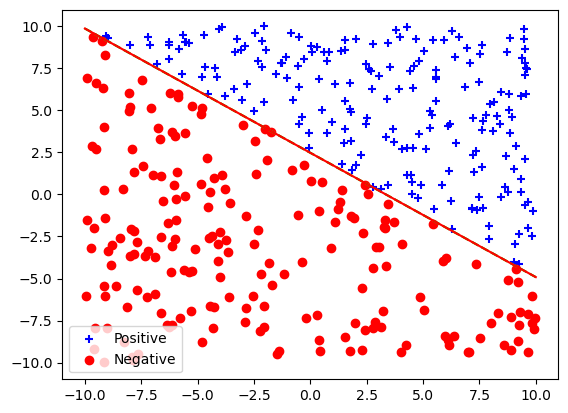

In [12]:
# Helper function to plot decision boundary
def plot_decision_boundary(w, color, style='-'):
    x_vals = np.array([-10, 10])
    y_vals = -(w[1] * x_vals + w[0]) / w[2]  # calculate decision boundary
    plt.plot(x_vals, y_vals, color=color, linestyle=style)

# Step 4: Plot the lines
w = perceptron(np.vstack([positive_samples, negative_samples]), 
               np.hstack([np.ones(200), -np.ones(200)]))

plt.scatter(positive_samples[:, 1], positive_samples[:, 2], marker='+', color='b', label='Positive')
plt.scatter(negative_samples[:, 1], negative_samples[:, 2], marker='o', color='r', label='Negative')

# Initial line
plot_decision_boundary(np.zeros(3), 'red', style='-')

# Intermediate lines (use smaller iterations to simulate)
w_intermediate1 = w * 0.3
w_intermediate2 = w * 0.7
plot_decision_boundary(w_intermediate1, 'yellow', style='--')
plot_decision_boundary(w_intermediate2, 'green', style='--')

# Final line
plot_decision_boundary(w, 'red', style='-')

plt.legend()
plt.show()
